# Lightguide-Spectrogram

In this notebook we create a spectrogram of a short time window in a given frequency range from the DAS data set used in the previous examples.

The vertical seismic profile shot was recorded in an ICDP borehole in Landwüst, Germany. The fibre is interrogated by a Silixa iDAS v2 and is cemented behind the casing.

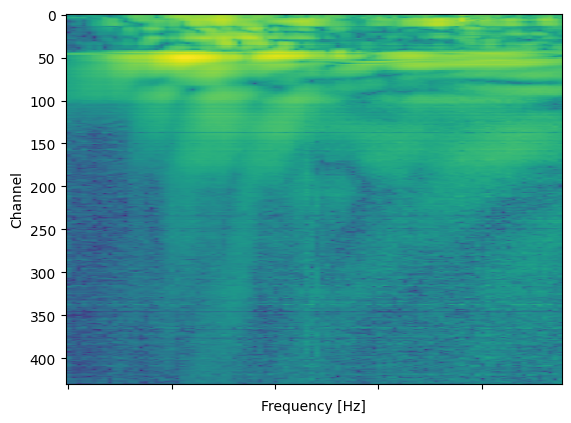

In [1]:
import matplotlib.pyplot as plt
from lightguide.client import ExampleData
from lightguide.spectrogram import get_spectrogram

data = ExampleData.vsp_shot()
data = data.trim_channels(begin=120, end=550)
data = data.trim_time(begin=1, end=2.9)
frequency_range = (10,60) #Hz
spectra, freq_grid, channel_grid = get_spectrogram(blast=data,
                                        frequency_range=frequency_range,
                                        plot = True,
                                        )

Alternatively, the spectrogram can be created for a fixed time window after a phase arrival time given in a pyrocko-snuffler markerfile.

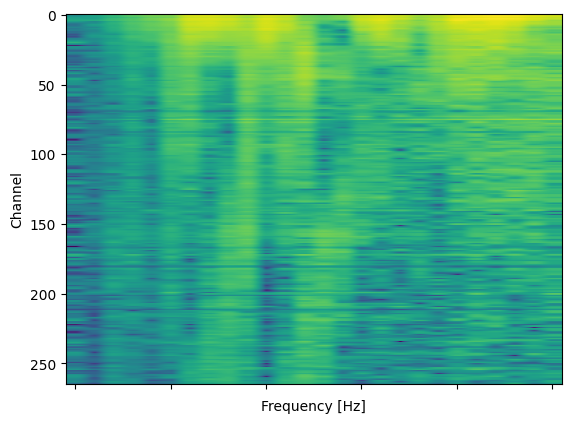

In [4]:
mfilename = 'mymarkers.txt'   # set name of markerfile
data = data.trim_channels(begin=165, end=550)
spectra, freq_grid, channel_grid = get_spectrogram(data,
                                        frequency_range=frequency_range,
                                        markerfile=mfilename,
                                        time_window=0.5,
                                        plot = True,
                                        )

`get_spectrogram` uses matplotlib's `imshow` for quick visualization. For better control on the axis scaling `pcolor` can alternatively be used for visualizing. 

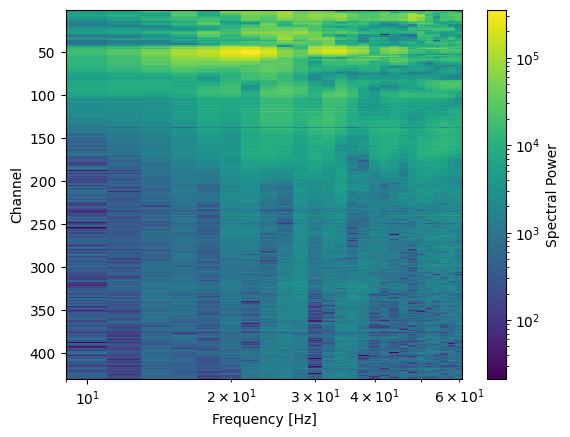

In [3]:
fig,ax = plt.subplots()
im = ax.pcolor(freq_grid,channel_grid,spectra, cmap='viridis',norm='log')
ax.invert_yaxis()
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]'), ax.set_ylabel('Channel')
fig.colorbar(im, ax=ax,label='Spectral Power');